In [2]:
import tensorflow as tf
import numpy as np
import os
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt

C:\Users\kouta\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
sess = tf.Session()

def gaussian(x,sigma,mu):
    #分散共分散行列の行列式
    det = np.linalg.det(sigma)
    #分散共分散行列の逆行列
    inv = np.linalg.inv(sigma)
    n = x.ndim
    tmp = (x - mu).dot(inv)
    diag = np.sum(tmp*(x - mu),axis=1)
    return np.exp(-diag/2.0) / (np.sqrt((2 * np.pi) ** n * det))

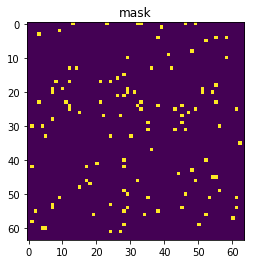

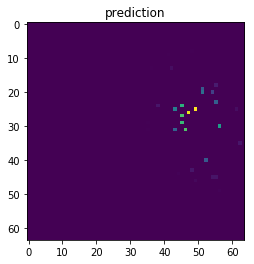

0.9971113980718153


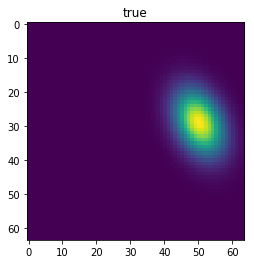

0.9971113980718153


In [8]:
X, Y = np.meshgrid(np.arange(0, 64, 1), np.arange(0, 64, 1)) # X座標,Y座標


dataNum = 120

# マスク画像
mask_X = [int(64*i) for i in [np.random.rand() for _ in range(dataNum)]]
mask_Y = [int(64*i) for i in [np.random.rand() for _ in range(dataNum)]]

mask = np.zeros([64,64])
for i,j in zip(mask_X,mask_Y):
    mask[i,j] = 1
plt.imshow(mask)
plt.title("mask")
plt.show()

# ================================
# 予測値
img = np.reshape(gaussian(np.c_[X.ravel(),Y.ravel()], np.array([[24,10],[10,42]]), [50,29]),[64,64])
# img = np.ones([64,64])/4096
plt.imshow(img*mask)
plt.title("prediction")
plt.show()
print(np.sum(img))
x = tf.Variable(img) #予測値

# ================================
# 真値
# img = np.reshape(gaussian(np.c_[X.ravel(),Y.ravel()], np.array([[32,10],[10,32]]), [26,32]),[64,64])
plt.imshow(img)
plt.title("true")
plt.show()
print(np.sum(img))
y = tf.Variable(img) #真値

In [9]:
def compKL(p1,p2,smallV=1e-10):
    kl = tf.reduce_sum(p1*(tf.math.log(p1+smallV) - tf.math.log(p2+smallV)))
    return kl

In [10]:
kl_loss = compKL(x,y)
grad = tf.gradients(kl_loss,x)[0]

sess.run(tf.global_variables_initializer())

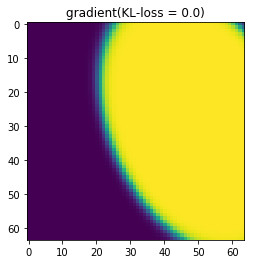

[[5.25382011e-16 3.76834034e-15 2.58069410e-14 ... 5.88105770e-01
  3.78673732e-01 1.98967750e-01]
 [6.43401413e-16 4.66594817e-15 3.23079423e-14 ... 7.73921744e-01
  5.96350388e-01 3.78414648e-01]
 [7.67378580e-16 5.62665842e-15 3.93915362e-14 ... 8.88806456e-01
  7.77180747e-01 5.92367543e-01]
 ...
 [1.20794585e-31 1.69622750e-30 2.27421867e-29 ... 9.95167302e-01
  9.94222503e-01 9.92769710e-01]
 [2.95002823e-32 4.18837716e-31 5.67775806e-30 ... 9.89945408e-01
  9.88122000e-01 9.85318265e-01]
 [7.01658395e-33 1.00722922e-31 1.38051902e-30 ... 9.78653779e-01
  9.75103448e-01 9.69647971e-01]]


In [11]:
grad_value, kl_value = sess.run([grad,kl_loss])
plt.imshow(grad_value)
plt.title("gradient(KL-loss = {})".format(kl_value))
plt.show()

print(grad_value)